# Testing some programming skills and learning curve in Python

## Warming up

Let's first check variable and loop knowledge: Look at the following code and what is is doing, the transform it 1) to display number from 1 to 5; 2) to display only pair numbers.

In [23]:
for i in range(0,13):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12


## Example of image processing

Before we start, we import some preliminary libraries, and load a predefined dataset. We also define a function that will simplify display of data.

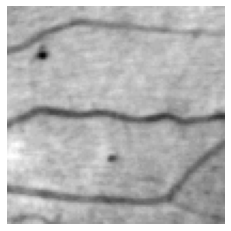

(array([5.000e+00, 2.000e+00, 5.700e+01, 2.660e+02, 5.170e+02, 1.081e+03,
        2.655e+03, 5.321e+03, 4.400e+02, 6.000e+01]),
 array([ 38. ,  47.1,  56.2,  65.3,  74.4,  83.5,  92.6, 101.7, 110.8,
        119.9, 129. ]),
 <a list of 10 Patch objects>)

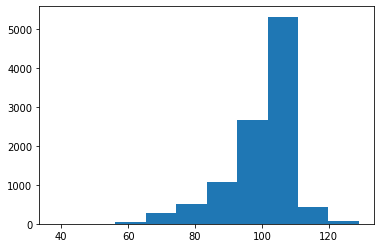

In [24]:
import skimage
import matplotlib.pyplot as plt
from skimage import data
testimage=data.microaneurysms()
def show_image(image,title='Image', cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.axis('off')
    plt.show()
    
show_image(testimage)
plt.hist(testimage.ravel())

Now let's try to get the position of both black dots

In [25]:
from skimage import filters
thimage=skimage.filters.threshold_otsu(testimage)
print(thimage)


93


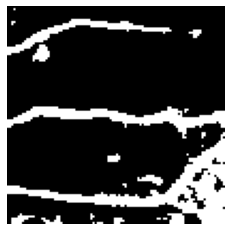

In [26]:
binary = testimage <93
show_image(binary)

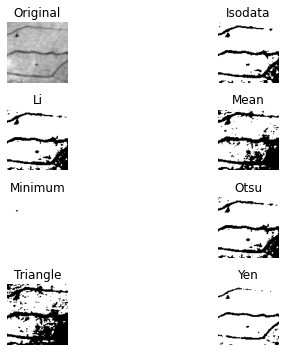

In [27]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(testimage, verbose=False)
plt.show()

In [28]:
thimage=skimage.filters.threshold_yen(testimage)
print(thimage)


84


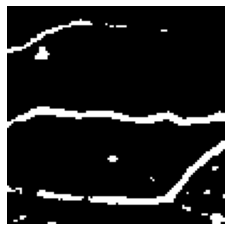

In [7]:
binary = testimage <thimage
show_image(binary)

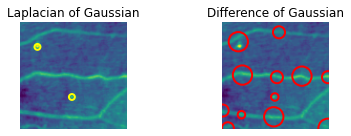

In [8]:
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt

image_gray=skimage.util.invert(testimage)
blobs_log = blob_log(image_gray, max_sigma=10, num_sigma=10,threshold=.075)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, min_sigma=1, max_sigma=10, threshold=.05)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray,min_sigma=1, max_sigma=10, threshold=.05)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 2, figsize=(6, 2), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image_gray)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

Compute the distance between spots? Hint: 1 pixel= 0.1 micron; Get coordinates example below:

In [9]:
print(blobs_log)

[[71.         49.          2.82842712]
 [23.         16.          2.82842712]]


In [20]:
print('x point 0 is '+str(blobs_log[0,0])+ ' pixels')
print('y point 0 is '+str(blobs_log[0,1])+ ' pixels')

x point 0 is 71.0 pixels
y point 0 is 49.0 pixels


# Some transformations

In [ ]:
from skimage import transform
import numpy as np
import time


In [13]:
tform = transform.EuclideanTransform(
    rotation=np.pi / 12.,
    translation = (0, 0)
    )
print(tform.params)

[[ 0.96592583 -0.25881905  0.        ]
 [ 0.25881905  0.96592583  0.        ]
 [ 0.          0.          1.        ]]


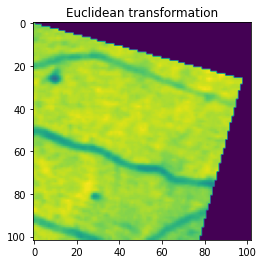

In [14]:
tf_img = transform.warp(testimage, tform.inverse)
fig, ax = plt.subplots()
ax.imshow(tf_img)
_ = ax.set_title('Euclidean transformation')

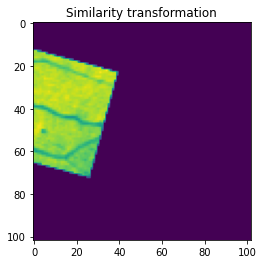

In [23]:
fig, ax = plt.subplots()
for i in range(1,5):
    tform = transform.SimilarityTransform(
        scale=0.5,
        rotation=np.pi/12,
        translation=(-10, 10*i))
    #print(tform.params)
    tf_img = transform.warp(testimage, tform.inverse)
  
   
    show_image(tf_img)
    
   